In [5]:
for i in range(0,7):
    log_d = -0.02878307 * dataframes[i]['rssi'] - 1.5813873130922256
    dataframes[i]['est_dist'] = log_d
    print(log_d)
    

0        0.260729
1        0.203163
2        0.289512
3        0.260729
4        0.318295
           ...   
67646    0.260729
67647    0.059248
67648    0.088031
67649    0.088031
67650    0.289512
Name: rssi, Length: 67651, dtype: float64
0        0.433428
1        0.347078
2        0.462211
3        0.404645
4        0.433428
           ...   
63432    0.462211
63433    0.462211
63434    0.318295
63435    0.663692
63436    0.490994
Name: rssi, Length: 63437, dtype: float64
0        0.519777
1        0.807607
2        0.462211
3        0.490994
4        0.519777
           ...   
55914    0.433428
55915    0.606126
55916    0.462211
55917    0.490994
55918    0.577343
Name: rssi, Length: 55919, dtype: float64
0        0.404645
1        0.433428
2        0.347078
3        0.519777
4        0.548560
           ...   
64327    0.404645
64328    0.404645
64329    0.490994
64330    0.490994
64331    0.375861
Name: rssi, Length: 64332, dtype: float64
0        0.519777
1        0.519777
2   

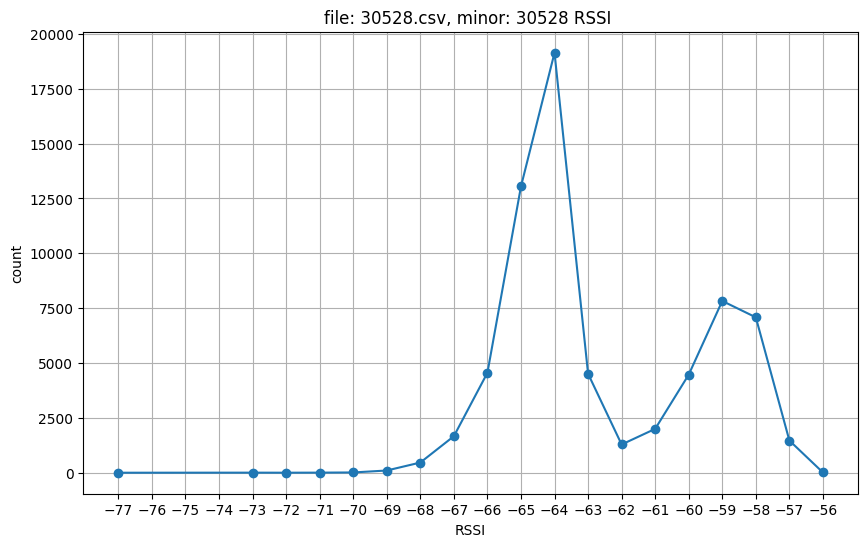

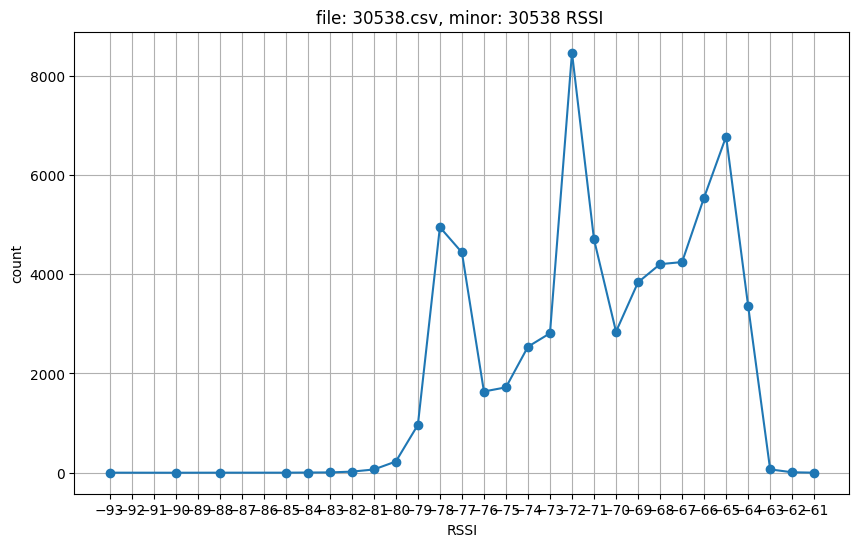

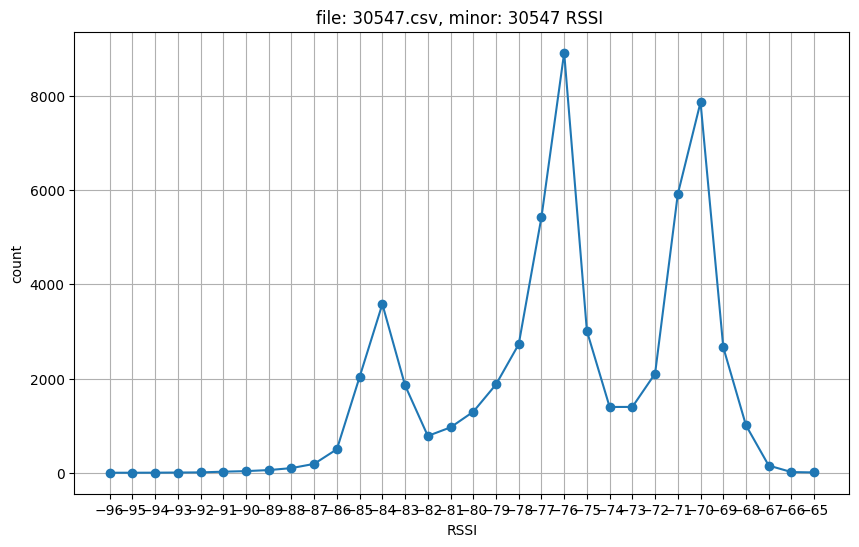

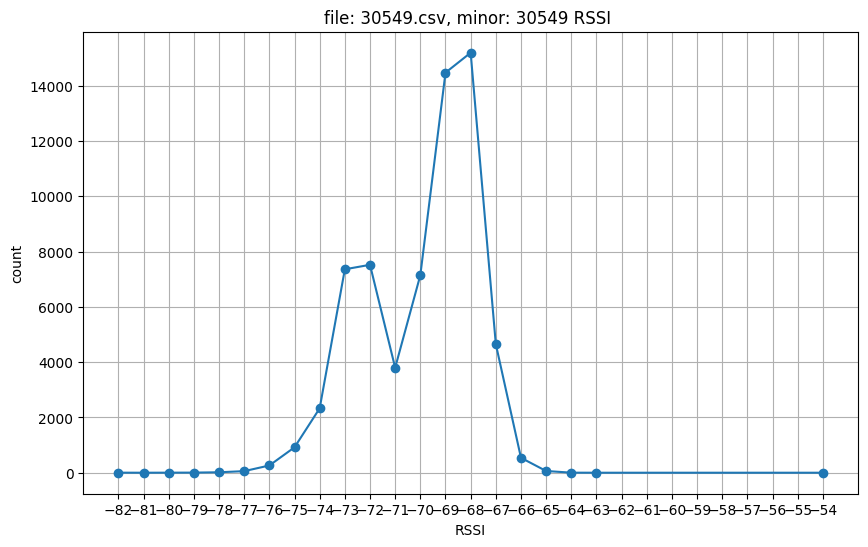

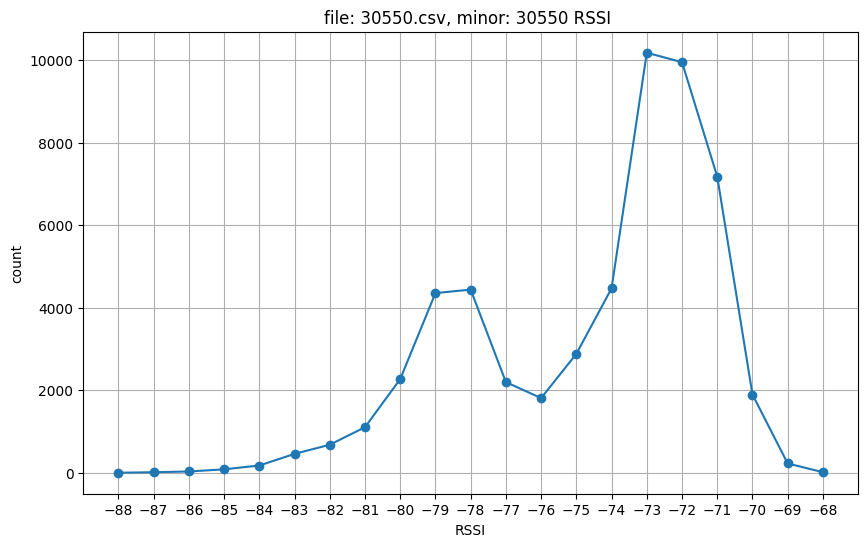

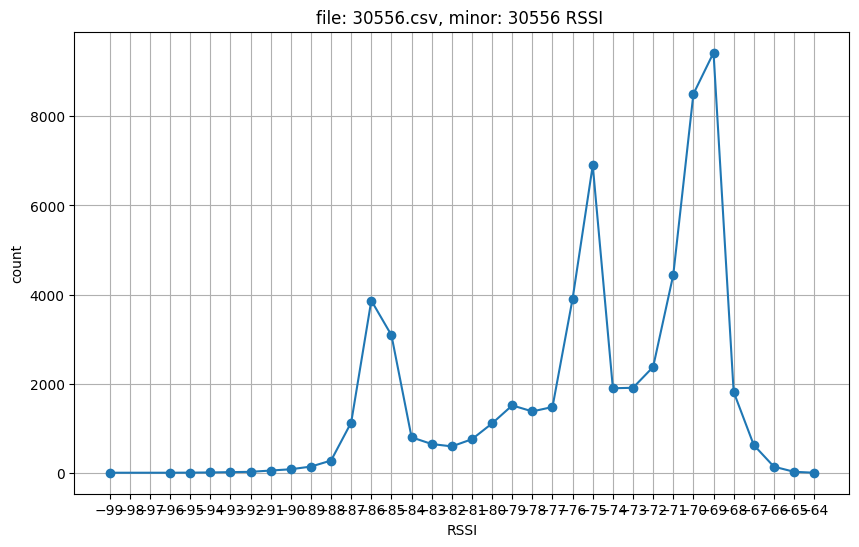

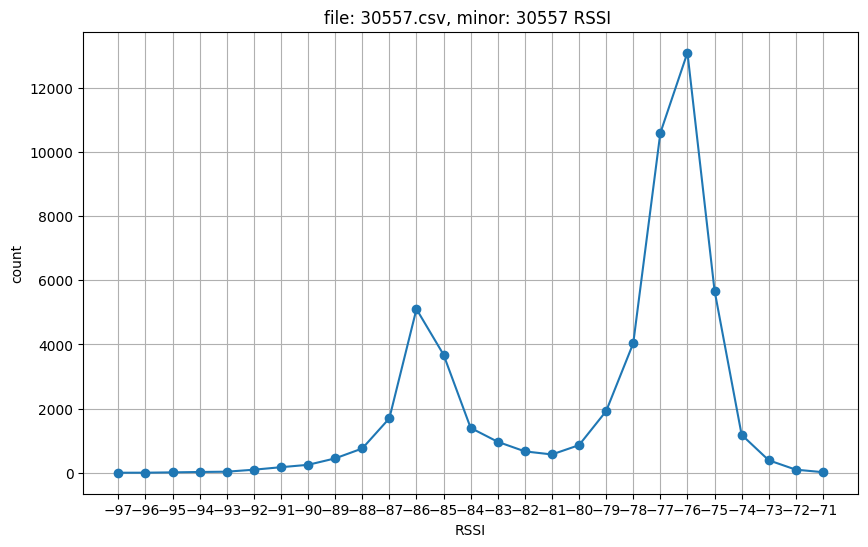

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 파일 경로
path = "/Users/yanghwayeong/Desktop/RSSI_Speed_Estimation/data/"
# 파일 목록
files = ['30528.csv', '30538.csv', '30547.csv', '30549.csv', '30550.csv', '30556.csv', '30557.csv']
dataframes = []

# 각 파일을 순회하면서 RSSI 분포 분석 및 시각화
for file in files:
    df = pd.read_csv(path + file)
    dataframes.append(df)

    # 비콘ID가 저장된 컬럼 이름을 확인해야 함. 여기서는 예시로 '비콘ID'라고 가정
    # 실제 데이터에 맞게 컬럼 이름을 수정해야 할 수 있음
    # 파일별로 모든 비콘ID에 대한 분석을 수행
    beacon_ids = df['minor'].unique()
    for minor in beacon_ids:
        target_df = df[df['minor'] == minor]

        # RSSI 값의 빈도 계산 
        rssi_counts = target_df['rssi'].value_counts().sort_index()
        
        # 라인 히스토그램 그리기
        plt.figure(figsize=(10, 6))  # 그래프 크기 조정
        plt.plot(rssi_counts.index, rssi_counts.values, marker='o', linestyle='-')
        plt.title(f'file: {file}, minor: {minor} RSSI ')
        plt.xlabel('RSSI')
        plt.ylabel('count')
        plt.grid(True)
        plt.xticks(range(min(target_df['rssi']), max(target_df['rssi'])+1, 1))

        plt.show()




In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 파일 경로
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
# 파일 목록
files = ['30538.csv', '30547.csv', '30549.csv', '30550.csv', '30556.csv', '30557.csv']
dataframes = []

# 각 파일을 순회하면서 RSSI 분포 분석 및 시각화
for file in files:
    df = pd.read_csv(path + file)
    dataframes.append(df)

    # 비콘ID가 저장된 컬럼 이름을 확인해야 함. 여기서는 예시로 '비콘ID'라고 가정
    # 실제 데이터에 맞게 컬럼 이름을 수정해야 할 수 있음
    # 파일별로 모든 비콘ID에 대한 분석을 수행
    beacon_ids = df['minor'].unique()
    for minor in beacon_ids:
        target_df = df[df['minor'] == minor]

        # RSSI 값의 빈도 계산
        rssi_counts = target_df['rssi'].value_counts().sort_index()
        rssi_filtered = rssi_counts[(rssi_counts <= 2000) & (rssi_counts > 0)]

        # 라인 히스토그램 그리기
        plt.figure(figsize=(10, 6))  # 그래프 크기 조정
        plt.plot(rssi_filtered.index, rssi_filtered.values, marker='o', linestyle='-')
        plt.title(f'file: {file}, minor: {minor} RSSI ')
        plt.xlabel('RSSI')
        plt.ylabel('count')
        plt.grid(True)
        plt.xticks(range(min(target_df['rssi']), max(target_df['rssi'])+1, 1))
        plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/30538.csv'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로 설정
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
filename = '30528.csv'

# 데이터 파일 불러오기
df = pd.read_csv(path + filename)

# unique() 함수를 사용하여 모든 고유 'minor' 값 확인
beacon_ids = df['minor'].unique()

for minor in beacon_ids:
    # 특정 'minor' 값에 대한 데이터 필터링
    target = df[df['minor'] == minor]
    
    # RSSI 값의 빈도수 계산
    rssi_counts = target['rssi'].value_counts().sort_index()
    
    # 카운트가 2500에서 0개 사이인 데이터만 필터링
    rssi_filtered = rssi_counts[(rssi_counts <= 2500) & (rssi_counts > 0)]
    
    if not rssi_filtered.empty:  # 필터링된 데이터가 비어 있지 않은 경우에만 그래프를 그림
        plt.figure(figsize=(10, 6))  # 그래프 크기 조절
        plt.plot(rssi_filtered.index, rssi_filtered.values, marker='o', linestyle='-', label=f'minor {minor}')
        plt.title(f'minor {minor}/ rssi count')
        plt.xlabel('RSSI')
        plt.ylabel('빈도수')
        plt.grid(True)
        plt.legend()
        plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/30528.csv'

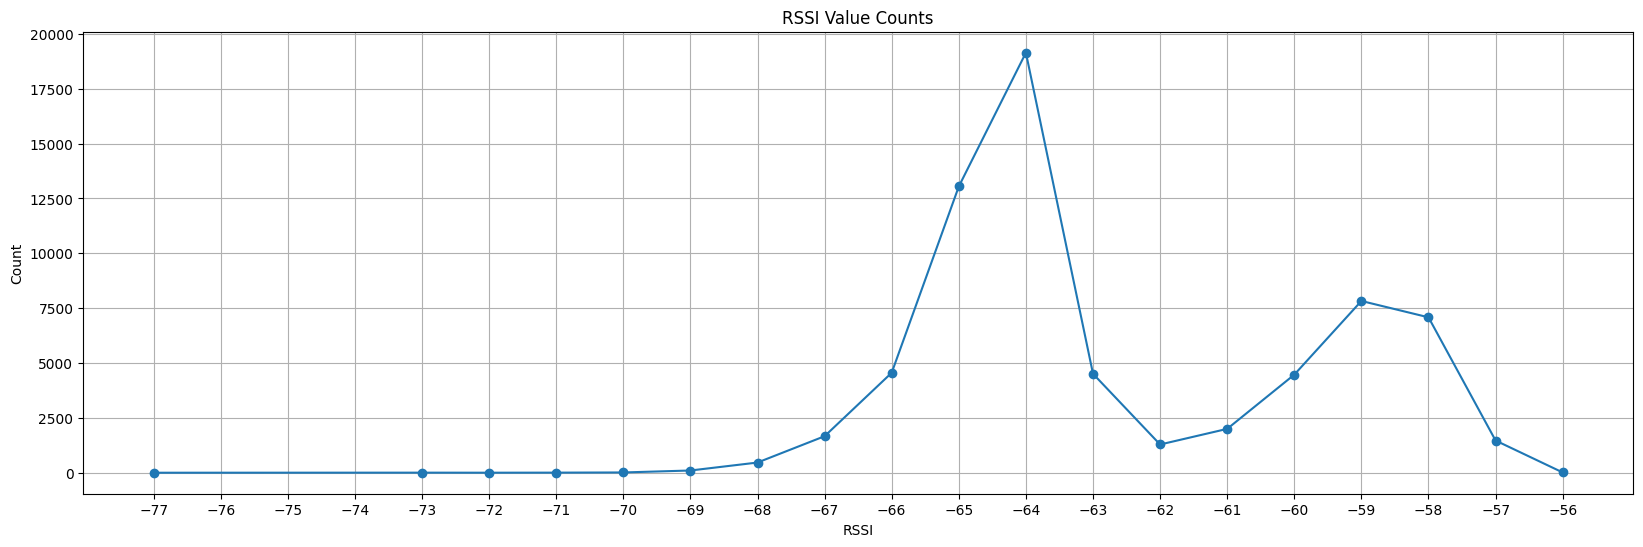

In [ ]:
target = df[df['minor'] == minor]
rssi_counts = target['rssi'].value_counts().sort_index()

plt.figure(figsize=(20, 6))  # 그래프 크기 조정
plt.plot(rssi_counts.index, rssi_counts.values, marker='o', linestyle='-')
plt.title('RSSI Value Counts')
plt.xlabel('RSSI')
plt.ylabel('Count')
plt.grid(True)
# x 축 눈금을 5단위로 조정
plt.xticks(range(min(target['rssi']), max(target['rssi'])+1, 1))
plt.show()

/Users/hwayeong/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwayeong/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwayeong/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


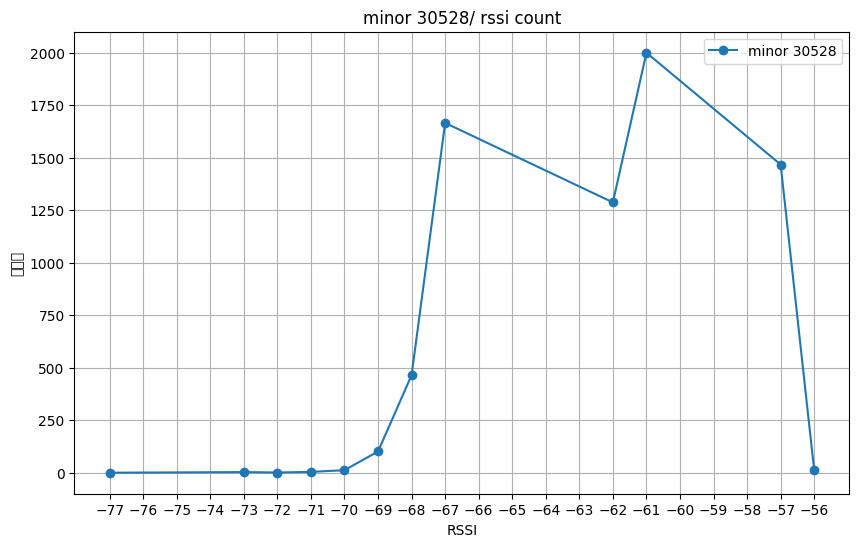

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로 설정
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
filename = '30528.csv'

# 데이터 파일 불러오기
df = pd.read_csv(path + filename)

# unique() 함수를 사용하여 모든 고유 'minor' 값 확인
beacon_ids = df['minor'].unique()

for minor in beacon_ids:
    # 특정 'minor' 값에 대한 데이터 필터링
    target = df[df['minor'] == minor]
    
    # RSSI 값의 빈도수 계산
    rssi_counts = target['rssi'].value_counts().sort_index()
    
    # 카운트가 2500에서 0개 사이인 데이터만 필터링
    rssi_filtered = rssi_counts[(rssi_counts <= 2500) & (rssi_counts > 0)]
    
    if not rssi_filtered.empty:  # 필터링된 데이터가 비어 있지 않은 경우에만 그래프를 그림
        plt.figure(figsize=(10, 6))  # 그래프 크기 조절
        plt.plot(rssi_filtered.index, rssi_filtered.values, marker='o', linestyle='-', label=f'minor {minor}')
        plt.title(f'minor {minor}/ rssi count')
        plt.xlabel('RSSI')
        plt.ylabel('빈도수')
        plt.grid(True)
        plt.legend()
    plt.xticks(range(min(target['rssi']), max(target['rssi'])+1, 1))
    plt.show()

In [ ]:
import pandas as pd
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
df = pd.read_csv(path + '30528.csv')
path2 = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/filtered_data/"
# -77 이상이고 -67 이하인 rssi 값을 제거
filtered_df = df[((df['rssi'] < -77) | (df['rssi'] > -67) )]

# 결과를 새로운 CSV 파일로 저장
filtered_df.to_csv(path2 + 'filtered_30528.csv', index=False)

In [ ]:
#2m 일때 
import pandas as pd
#path2 = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/filtered_data/"
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
df = pd.read_csv(path + '30538.csv')
# -77 이상이고 -67 이하인 rssi 값을 제거
# filtered_df = df[~((df['rssi'] >= -77) & (df['rssi'] <= -67)) & (df['rssi'] >= -64)]
filtered_df = df[((df['rssi'] < -93) | (df['rssi'] > -79)) & ((df['rssi']  < -76) | (df['rssi'] > -75)) & (df['rssi'] < -63)]

# 결과를 새로운 CSV 파일로 저장
filtered_df.to_csv(path + 'filtered_30538.csv', index=False)



In [ ]:
#4m 일때 
import pandas as pd
#path2 = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/filtered_data/"
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
df = pd.read_csv(path + '30549.csv')
# -77 이상이고 -67 이하인 rssi 값을 제거
# filtered_df = df[~((df['rssi'] >= -77) & (df['rssi'] <= -67)) & (df['rssi'] >= -64)]
filtered_df = df[((df['rssi'] < -82 ) | (df['rssi'] > -74 )) & ((df['rssi']  < -83) | (df['rssi'] > -79))  & ((df['rssi']  < -74) | (df['rssi'] > -72))]& ((df['rssi']  < -69) | (df['rssi'] > -65))

# 결과를 새로운 CSV 파일로 저장
filtered_df.to_csv(path + 'filtered_30547.csv', index=False)



In [ ]:
import pandas as pd
import os

# 파일 경로
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
# 파일 목록
files = ['30547.csv', '30549.csv', '30550.csv', '30556.csv', '30557.csv']

# 각 파일을 순회하면서 RSSI 분포 분석 및 시각화
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    
    # 비콘ID가 저장된 컬럼 이름을 확인
    beacon_ids = df['minor'].unique()
    # 조건을 만족하는 데이터만 남기기 위한 빈 데이터프레임 생성
    filtered_df = pd.DataFrame()
    for minor in beacon_ids:
        target_df = df[df['minor'] == minor]

        # 해당 비콘ID에 대한 데이터 수가 2500개 초과인 경우만 필터링된 데이터프레임에 추가
        if len(target_df) > 2500:
            filtered_df = pd.concat([filtered_df, target_df])

    # 필터링된 데이터를 원본 파일에 덮어쓰기
    filtered_df.to_csv(os.path.join(path, file), index=False)



In [ ]:
import pandas as pd
import os

# 파일 경로
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
# 파일 목록
files = ['30528.csv']

# 각 파일을 순회하면서 RSSI 분포 분석 및 시각화
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    
    # 비콘ID가 저장된 컬럼 이름을 확인해야 함. 여기서는 예시로 'minor'라고 가정
    beacon_ids = df['minor'].unique()
    for minor in beacon_ids:
        target_df = df[df['minor'] == minor]

        # 해당 비콘ID에 대한 데이터 수가 2000개 초과인지 확인
        if len(target_df) > 2500:
            # 새로운 파일명 지정
            new_filename = f"{minor}_{file}"
            # 새로운 파일 경로 지정
            new_filepath = os.path.join(path, new_filename)
            # 조건을 만족하는 데이터를 CSV 파일로 저장
            target_df.to_csv(new_filepath, index=False)

In [ ]:
import pandas as pd
import os

path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
files = ['30528.csv']

for file in files:
    df = pd.read_csv(path + file)
    beacon_ids = df['minor'].unique()
    
    for minor in beacon_ids:
        target = df[df['minor'] == minor]
        rssi_counts = target['rssi'].value_counts()
        
        # 2000번 이상 등장하는 rssi 값만 유지
        rssi_to_keep = rssi_counts[rssi_counts >= 2500].index.tolist()
        
        if rssi_to_keep:
            # 조건을 만족하는 rssi 값에 해당하는 데이터만 필터링
            filtered_df = target[target['rssi'].isin(rssi_to_keep)]
            new_filename = f"{minor}_{file}"
            new_filepath = os.path.join(path, new_filename)
            filtered_df.to_csv(new_filepath, index=False)



In [ ]:
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
files = ['30528_30528.csv', '30538_30538.csv', '30547_30547.csv', '30549_30549.csv', '30550_30550.csv', '30556_30556.csv', '30557_30557.csv']
dataframes = []
for file in files:
    df = pd.read_csv(path + file)
    dataframes.append(df)
print(dataframes[0])

                       x  major  minor  rssi  txpower  est_dist  \
0      c2:02:0b:00:05:44  40001  30528   -64      -59      1.82   
1      c2:02:0b:00:05:44  40001  30528   -65      -59      1.94   
2      c2:02:0b:00:05:44  40001  30528   -64      -59      1.82   
3      c2:02:0b:00:05:44  40001  30528   -66      -59      2.08   
4      c2:02:0b:00:05:44  40001  30528   -64      -59      1.82   
...                  ...    ...    ...   ...      ...       ...   
60623  c2:02:0b:00:05:44  40001  30528   -66      -59      2.08   
60624  c2:02:0b:00:05:44  40001  30528   -64      -59      1.82   
60625  c2:02:0b:00:05:44  40001  30528   -58      -59      0.84   
60626  c2:02:0b:00:05:44  40001  30528   -58      -59      0.84   
60627  c2:02:0b:00:05:44  40001  30528   -65      -59      1.94   

                   time  real_dist  
0      2021.11.16 14:20          1  
1      2021.11.16 14:20          1  
2      2021.11.16 14:20          1  
3      2021.11.16 14:20          1  
4      202

In [ ]:
import pandas as pd 

#RSSI 그래프 도출 
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
files = ['30528_30528.csv', '30538_30538.csv', '30547_30547.csv', '30549_30549.csv', '30550_30550.csv', '30556_30556.csv', '30557_30557.csv']
dataframes = []
for file in files:
    df = pd.read_csv(path + file)
    dataframes.append(df)
rssi = pd.DataFrame(dataframes[0]['rssi'][0:60628]) #1m
rssi1 = pd.DataFrame(dataframes[1]['rssi'][0:58700]) #2m
rssi2 = pd.DataFrame(dataframes[2]['rssi'][0:44252]) #3m
rssi3 = pd.DataFrame(dataframes[3] ['rssi'][0:62454]) #4m
rssi4 = pd.DataFrame(dataframes[4]['rssi'][0:47928]) #5m
rssi5 =  pd.DataFrame(dataframes[5]['rssi'][0:42504]) #6m
rssi6 = pd.DataFrame(dataframes[6]['rssi'][0:42166]) #7m

rssimin = rssi.min()
rssimax = rssi.max()
rssiaverage = rssi.mean() 
rssiaverage1 = rssi1.mean()
rssiaverage2 = rssi2.mean()
rssiaverage3 = rssi3.mean()
rssiaverage4 = rssi4.mean()
rssiaverage5 = rssi5.mean()
rssiaverage6 = rssi6.mean()
print(rssimin,rssimax)
print(rssiaverage,rssiaverage1, rssiaverage2, rssiaverage3,rssiaverage4,rssiaverage5, rssiaverage6 )

print(dataframes[0]['real_dist'])
rssi = dataframes[0]['real_dist'] +1.5813873130922256 / -0.02878307 
print(rssi)


rssi   -66
dtype: int64 rssi   -58
dtype: int64
rssi   -62.649782
dtype: float64 rssi   -70.164566
dtype: float64 rssi   -74.892276
dtype: float64 rssi   -69.862795
dtype: float64 rssi   -74.229678
dtype: float64 rssi   -73.90215
dtype: float64 rssi   -78.302685
dtype: float64
0        1
1        1
2        1
3        1
4        1
        ..
60623    1
60624    1
60625    1
60626    1
60627    1
Name: real_dist, Length: 60628, dtype: int64
0       -53.941579
1       -53.941579
2       -53.941579
3       -53.941579
4       -53.941579
           ...    
60623   -53.941579
60624   -53.941579
60625   -53.941579
60626   -53.941579
60627   -53.941579
Name: real_dist, Length: 60628, dtype: float64


In [ ]:
c

In [ ]:
#Real distance 으로 추출한 RSSI 그래프 
import pandas as pd
#데이터 불러오는 코드  
path = "/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/"
files = ['30528.csv', '30538.csv', '30547.csv', '30549.csv', '30550.csv', '30556.csv', '30557.csv']
#print(dataframes[2])
dataframes = [] 
for file in files:
    df = pd.read_csv(path + file)
    dataframes.append(df)

print(dataframes[1]['real_dist'].head())
rssi = 10**(2.5813873130922256 / -0.02878307 )
rssi1 = 3.5813873130922256 / -0.02878307 
rssi2 = 4.5813873130922256 / -0.02878307 
rssi3 = 5.5813873130922256 / -0.02878307 
rssi4 = 6.5813873130922256 / -0.02878307 
rssi5 = 7.5813873130922256 / -0.02878307 
rssi6 = 8.5813873130922256 / -0.02878307 


print(rssi,rssi,rssi2,rssi3,rssi4,rssi5,rssi6)

0    2
1    2
2    2
3    2
4    2
Name: real_dist, dtype: int64
-89.68422454909172 -89.68422454909172 -159.16951572894155 -193.91216131886645 -228.65480690879136 -263.3974524987163 -298.1400980886412


In [ ]:
import math 
for i in range(1,7):
    rssi = (math.log(i) + 1.58662651) / -0.02885017
    print(rssi)

-54.99539552106626
-79.02115275438395
-93.07531978730488
-103.04690998770165
-110.78147624204988
-117.10107702062257


rssi   -62.649782
dtype: float64 rssi   -70.164566 
dtype: float64 rssi   -74.892276
dtype: float64 rssi   -69.862795
dtype: float64 rssi   -74.229678
dtype: float64 rssi   -73.90215
dtype: float64 rssi   -78.302685

In [ ]:
print(10**((-0.02885017 * -54.99539552106626) - 1.58662651))

1.0
